In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Used Car Dataset.csv')
df1=pd.read_csv('aaa.csv')


In [4]:
df.head()


,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [5]:
df.rename(columns={'price(in lakhs)':'price'},inplace=True)




In [6]:
df.rename(columns={'engine(cc)':'engine'},inplace=True)


In [7]:
df.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [8]:
df['Company']=df['car_name'].str.split(' ').str[1]

In [9]:
df.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,Mercedes-Benz
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,Nissan
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,BMW
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,Kia
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,Skoda


In [10]:
df.drop(['car_name'],axis=1,inplace=True)

In [11]:
df.head()

,Unnamed: 0,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company
0,0,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,Mercedes-Benz
1,1,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,Nissan
2,2,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,BMW
3,3,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,Kia
4,4,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,Skoda


In [12]:
df['Company'].unique()

array(['Mercedes-Benz', 'Nissan', 'BMW', 'Kia', 'Skoda', 'Honda',
       'Hyundai', 'Tata', 'Renault', 'Ford', 'Jeep', 'MG', 'Maruti',
       'Audi', 'Toyota', 'Jaguar', 'Volkswagen', 'Mahindra', 'Volvo',
       'Land', 'Isuzu', 'Mitsubishi', 'Porsche', 'Datsun', 'Lexus',
       'Mini', 'Fiat', 'Lamborghini'], dtype=object)

In [13]:
df['Company']=df['Company'].map({'Mercedes-Benz':0, 'Nissan':1, 'BMW':2, 'Kia':3, 'Skoda':4, 'Honda':5,
       'Hyundai':6, 'Tata':7, 'Renault':8, 'Ford':9, 'Jeep':10, 'MG':11, 'Maruti':12,
       'Audi':13, 'Toyota':14, 'Jaguar':15, 'Volkswagen':16, 'Mahindra':17, 'Volvo':18,
       'Land':19, 'Isuzu':20, 'Mitsubishi':21, 'Porsche':22, 'Datsun':23, 'Lexus':24,
       'Mini':25, 'Fiat':26, 'Lamborghini':27})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownsership          1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1550 non-null   float64
 10  engine              1550 non-null   float64
 11  max_power(bhp)      1550 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price               1553 non-null   float64
 14  Company             1553 non-null   int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 182.1+

In [15]:
df.head()

,Unnamed: 0,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company
0,0,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,0
1,1,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,1
2,2,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,2
3,3,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,3
4,4,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,4


In [16]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine                3
max_power(bhp)        3
torque(Nm)            4
price                 0
Company               0
dtype: int64

In [18]:
df.head()

,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company
0,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,0
1,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,1
2,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,2
3,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,3
4,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,4


In [19]:
df['insurance_validity'].unique()

array(['Comprehensive', 'Third Party insurance', 'Zero Dep',
       'Third Party', 'Petrol', 'Not Available'], dtype=object)

In [20]:
df['insurance_validity']=df['insurance_validity'].replace({'Comprehensive':0, 'Third Party insurance':1, 'Zero Dep':2,
       'Third Party':3, 'Petrol':4, 'Not Available':5})

In [21]:
df.head()

,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company
0,Jul-17,0,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,0
1,Jan-21,0,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,1
2,Sep-18,0,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,2
3,Dec-19,0,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,3
4,Aug-19,0,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,4


In [22]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', '5 Seats'], dtype=object)

In [23]:
df['fuel_type']=df['fuel_type'].map({'Petrol':0, 'Diesel':1, 'CNG':2, '5 Seats':3})

In [24]:
df['ownsership'].unique()

array(['First Owner', 'Second Owner', 'Third Owner', '2993 cc', '1461 cc',
       '998 cc', '1995 cc', '1451 cc', '1998 cc', '1498 cc', '1497 cc',
       '1996 cc', '1950 cc', '2013', 'Fifth Owner', '1199 cc', '1248 cc',
       '999 cc', '1197 cc', '1984 cc', '2999 cc', '1968 cc'], dtype=object)

In [25]:
df[df['engine'].isnull()]

,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company
513,Dec-11,0,0,5,51710,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.48,14
533,Dec-11,0,0,5,51710,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.48,14
589,Jul-11,0,0,5,54214,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.55,14


In [26]:
df['transmission'].unique()

array(['Automatic', 'Manual', '2017', '2014', '2023', '2020', '2021',
       '2011', '2022', 'Power Windows Front', '2018', '2015', '2016'],
      dtype=object)

In [27]:
df['transmission'].replace({'2017':'NaN', '2014':'NaN', '2023':'NaN', '2020':'NaN', '2021':'NaN',
       '2011':'NaN', '2022':'NaN','2018':'NaN', '2015':'NaN', '2016':'NaN'},inplace=True)

In [28]:
df['ownsership']=df['ownsership'].replace({'2993 cc':'NaN', '1461 cc':'NaN',
       '998 cc':'NaN', '1995 cc':'NaN', '1451 cc':'NaN', '1998 cc':'NaN', '1498 cc':'NaN', '1497 cc':'NaN',
       '1996 cc':'NaN', '1950 cc':'NaN', '2013':'NaN','1199 cc':'NaN', '1248 cc':'NaN',
       '999 cc':'NaN', '1197 cc':'NaN', '1984 cc':'NaN', '2999 cc':'NaN', '1968 cc':'NaN'})

In [29]:
df['ownsership'].unique()

array(['First Owner', 'Second Owner', 'Third Owner', 'NaN', 'Fifth Owner'],
      dtype=object)

In [30]:
df[df['ownsership']=='NaN']

,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company
116,2017,1,1,5,60000,NaN,NaN,Power Steering,2993.00,26149.0,26149.0,620.0,55.00,2
136,2017,1,1,5,60000,NaN,NaN,Power Steering,2993.00,26149.0,26149.0,620.0,55.00,2
170,2014,1,1,5,100000,NaN,NaN,Power Steering,1461.00,1085.0,1085.0,248.0,6.00,1
190,2014,1,1,5,100000,NaN,NaN,Power Steering,1461.00,1085.0,1085.0,248.0,6.00,1
210,2023,1,0,5,10000,NaN,NaN,Power Steering,998.00,11841.0,11841.0,172.0,11.70,6
213,2017,1,1,5,30000,NaN,NaN,Power Steering,1995.00,188.0,188.0,400.0,19.50,2
228,2020,1,0,6,20000,NaN,NaN,Power Windows Front,1451.00,141.0,141.0,250.0,17.50,11
231,2017,1,1,5,32000,NaN,NaN,Power Steering,1995.00,188.0,188.0,400.0,18.20,2
233,2017,1,1,5,32000,NaN,NaN,Power Steering,1995.00,188.0,188.0,400.0,18.20,2
234,2017,1,1,5,32000,NaN,NaN,Power Steering,1995.00,188.0,188.0,400.0,18.20,2


In [31]:
df.shape

(1553, 14)

In [32]:
df=df[df['ownsership']!='NaN']

In [33]:
df.shape

(1503, 14)

In [34]:
df=df[df['transmission']!='NaN']

In [35]:
df.shape

(1503, 14)

In [36]:
df['ownsership'].unique()

array(['First Owner', 'Second Owner', 'Third Owner', 'Fifth Owner'],
      dtype=object)

In [37]:
df['ownsership']=df['ownsership'].map({'First Owner':0, 'Second Owner':1, 'Third Owner':2 ,'Fifth Owner':3})

In [38]:
df.head()

,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company
0,Jul-17,0,0,5,56000,0,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,0
1,Jan-21,0,0,5,30615,0,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,1
2,Sep-18,0,1,5,24000,0,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,2
3,Dec-19,0,0,5,18378,0,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,3
4,Aug-19,0,0,5,44900,0,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,4


In [39]:
df['transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [40]:
df['transmission']=df['transmission'].map({'Automatic':0, 'Manual':1})

In [41]:
df.head()

,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company
0,Jul-17,0,0,5,56000,0,0,2017,7.81,2996.0,2996.0,333.0,63.75,0
1,Jan-21,0,0,5,30615,0,0,2020,17.40,999.0,999.0,9863.0,8.99,1
2,Sep-18,0,1,5,24000,0,0,2018,20.68,1995.0,1995.0,188.0,23.75,2
3,Dec-19,0,0,5,18378,0,1,2019,16.50,1353.0,1353.0,13808.0,13.56,3
4,Aug-19,0,0,5,44900,0,0,2019,14.67,1798.0,1798.0,17746.0,24.00,4


In [42]:
df.drop(['registration_year'],axis=1,inplace=True)

In [43]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company
0,0,0,5,56000,0,0,2017,7.81,2996.0,2996.0,333.0,63.75,0
1,0,0,5,30615,0,0,2020,17.40,999.0,999.0,9863.0,8.99,1
2,0,1,5,24000,0,0,2018,20.68,1995.0,1995.0,188.0,23.75,2
3,0,0,5,18378,0,1,2019,16.50,1353.0,1353.0,13808.0,13.56,3
4,0,0,5,44900,0,0,2019,14.67,1798.0,1798.0,17746.0,24.00,4


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1503 entries, 0 to 1552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   insurance_validity  1503 non-null   int64  
 1   fuel_type           1503 non-null   int64  
 2   seats               1503 non-null   int64  
 3   kms_driven          1503 non-null   int64  
 4   ownsership          1503 non-null   int64  
 5   transmission        1503 non-null   int64  
 6   manufacturing_year  1503 non-null   object 
 7   mileage(kmpl)       1500 non-null   float64
 8   engine              1500 non-null   float64
 9   max_power(bhp)      1500 non-null   float64
 10  torque(Nm)          1499 non-null   float64
 11  price               1503 non-null   float64
 12  Company             1503 non-null   int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 164.4+ KB


In [45]:
df['manufacturing_year']=df['manufacturing_year'].astype(int)

In [46]:
df['service_year']=2024-df['manufacturing_year']

In [47]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company,service_year
0,0,0,5,56000,0,0,2017,7.81,2996.0,2996.0,333.0,63.75,0,7
1,0,0,5,30615,0,0,2020,17.40,999.0,999.0,9863.0,8.99,1,4
2,0,1,5,24000,0,0,2018,20.68,1995.0,1995.0,188.0,23.75,2,6
3,0,0,5,18378,0,1,2019,16.50,1353.0,1353.0,13808.0,13.56,3,5
4,0,0,5,44900,0,0,2019,14.67,1798.0,1798.0,17746.0,24.00,4,5


In [48]:
df.drop(['manufacturing_year'],axis=1,inplace=True)

In [49]:
df['price']=df['price'].astype(int)

In [50]:
df.dropna(inplace=True)

In [51]:
df.shape

(1499, 13)

In [52]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company,service_year
0,0,0,5,56000,0,0,7.81,2996.0,2996.0,333.0,63,0,7
1,0,0,5,30615,0,0,17.40,999.0,999.0,9863.0,8,1,4
2,0,1,5,24000,0,0,20.68,1995.0,1995.0,188.0,23,2,6
3,0,0,5,18378,0,1,16.50,1353.0,1353.0,13808.0,13,3,5
4,0,0,5,44900,0,0,14.67,1798.0,1798.0,17746.0,24,4,5


In [53]:
X=df
y=df.price


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [55]:
X_train

,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,mileage(kmpl),engine,max_power(bhp),torque(Nm),price,Company,service_year
516,0,0,5,62411,0,1,998.00,671.0,671.0,90.0,2,12,11
559,1,1,5,75000,1,0,11.74,2987.0,2987.0,2548.0,17,0,10
203,1,0,5,40045,0,0,11.90,1950.0,1950.0,20115.0,43,0,3
933,0,0,5,40775,1,0,20.04,1462.0,1462.0,10325.0,8,12,5
888,0,0,5,52235,1,1,17.00,1591.0,1591.0,1213.0,7,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0,0,5,17778,0,0,20.70,1197.0,1197.0,8186.0,7,6,4
1344,0,0,5,27012,0,1,21.21,1197.0,1197.0,8180.0,5,12,4
904,0,0,5,86916,1,1,18.90,1197.0,1197.0,82.0,3,6,10
1512,0,0,5,22700,0,1,18.90,1197.0,1197.0,8186.0,5,6,6


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
X_train=scaler.fit_transform(X_train)

In [58]:
X_test=scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [60]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [61]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [62]:
mse

array([-1.30586927e-23, -9.50194879e-24, -4.97231945e-24, -1.44175419e-23,
       -3.09087784e-24, -1.65359096e-22, -2.07072726e-23, -6.43226592e-24,
       -2.47067278e-23, -1.28730934e-23])

In [63]:
reg_pred=regression.predict(X_test)

In [64]:
reg_pred

array([8.0e+00, 5.0e+00, 2.0e+00, 4.0e+00, 3.0e+00, 6.6e+01, 1.0e+00,
       1.6e+01, 1.2e+01, 3.3e+01, 2.3e+01, 3.0e+00, 5.0e+00, 7.0e+00,
       1.5e+01, 3.7e+01, 5.0e+00, 8.0e+01, 5.0e+00, 6.0e+00, 1.3e+01,
       9.0e+00, 5.0e+00, 2.0e+00, 4.0e+00, 1.0e+00, 3.0e+00, 6.0e+00,
       4.0e+00, 5.0e+00, 1.3e+01, 5.0e+00, 2.0e+00, 5.0e+00, 4.9e+01,
       1.1e+01, 1.5e+01, 2.0e+00, 6.0e+00, 2.0e+00, 1.7e+01, 7.0e+00,
       8.0e+00, 7.1e+01, 3.0e+00, 3.0e+00, 4.7e+01, 5.2e+01, 2.9e+01,
       5.0e+00, 1.6e+01, 1.3e+01, 2.9e+01, 3.0e+00, 4.5e+01, 5.0e+01,
       1.5e+01, 9.0e+00, 4.0e+00, 4.0e+00, 1.7e+01, 3.0e+00, 1.1e+01,
       6.0e+00, 5.9e+01, 5.0e+00, 3.9e+01, 4.0e+00, 4.0e+00, 1.0e+00,
       2.6e+01, 7.0e+00, 4.0e+00, 6.0e+00, 1.9e+01, 5.0e+00, 4.2e+01,
       1.0e+00, 7.0e+01, 3.0e+00, 7.0e+00, 1.5e+01, 2.4e+01, 1.2e+01,
       2.0e+01, 1.4e+01, 1.6e+01, 4.0e+00, 8.2e+01, 2.0e+00, 5.0e+00,
       4.0e+00, 4.4e+01, 4.0e+00, 5.0e+00, 6.1e+01, 5.6e+01, 2.2e+01,
       5.0e+00, 5.2e

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


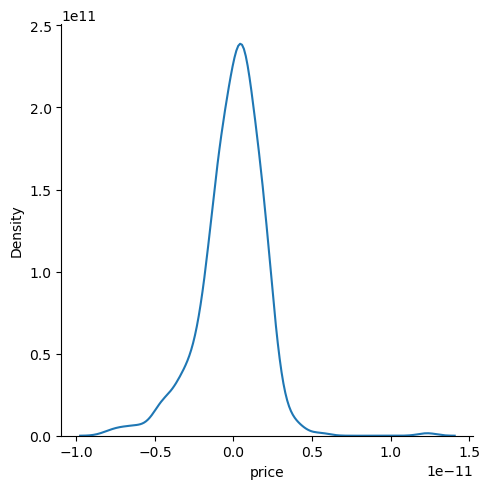

In [65]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [66]:
from sklearn.metrics import r2_score

In [67]:
score=r2_score(reg_pred,y_test)

In [68]:
score

1.0